## 《合成孔径雷达成像——算法与实现》中3.3.2 线性调频信号的匹配滤波

这里主要对图3.6的匹配滤波器作了加窗（Kaiser窗）处理，使得脉冲压缩效果有了变化：加窗之后的信号幅度较未加窗信号有了降低，但峰值旁瓣比下降了7dB。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,fftshift,ifft,ifftshift

plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [4]:
T = 7.24e-6;               # % 信号持续时间
B = 5.8e6;                 # % 信号带宽
K = B/T;                   # % 调频率
ratio = 10;                # % 过采样率
Fs = ratio*B;              # % 采样频率
dt = 1/Fs;                 # % 采样间隔
N = int(np.ceil(T/dt));         #    % 采样点数
t = ((np.arange(N))-N/2)/N*T;     # % 时间轴flipud

st = np.exp(1j*np.pi*K*t**2);    # % 生成信号
#print(st.shape)
ht = np.conj(np.flipud(st));     # % 匹配滤波器

window = np.kaiser(N,2.5).transpose();
ht_window = window*np.conj(np.flipud(st));            #   %flipud


In [5]:
Sf = fftshift(fft(fftshift(st)));
Hf = fftshift(fft(fftshift(ht)));
Hf_window = fftshift(fft(fftshift(ht_window)));

out = ifftshift(ifft(ifftshift(Sf*Hf)));
out_window = ifftshift(ifft(ifftshift(Sf*Hf_window)));


# Z = np.abs(out);
# Z = Z/np.max(Z);
# Z = 20*np.log10(np.spacing(1)+Z);

Z1 = np.abs(out);
Z1 = Z1/np.max(Z1);
Z1 = 20*np.log10(Z1);

Z2 = np.abs(out_window);
Z2 = Z2/np.max(Z2);
Z2 = 20*np.log10(Z2);

tt = np.linspace(-0.5,0.5,N);


d:\anaconda3\envs\stock\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
d:\anaconda3\envs\stock\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


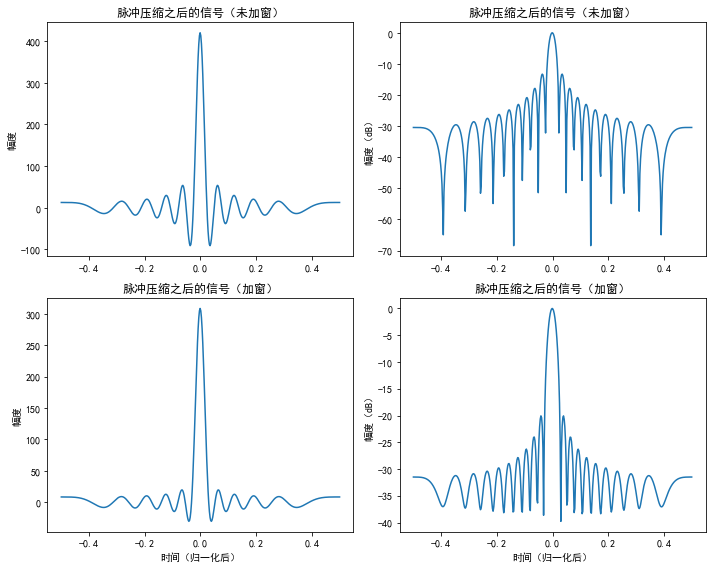

In [6]:
fig = plt.figure(figsize=(10,8))#set(gcf,'Color','w');
plt.subplot(2,2,1)
plt.plot(tt,out);
plt.title('脉冲压缩之后的信号（未加窗）');plt.ylabel('幅度');
plt.subplot(2,2,2)
plt.plot(tt,Z1)#axis([-1 1 -30 0]);
plt.title('脉冲压缩之后的信号（未加窗）');plt.ylabel('幅度（dB）');
plt.subplot(2,2,3);
plt.plot(tt,out_window);
plt.title('脉冲压缩之后的信号（加窗）');plt.xlabel('时间（归一化后）');plt.ylabel('幅度');
plt.subplot(2,2,4);
plt.plot(tt,Z2)#;axis([-1 1 -5 5]);
plt.title('脉冲压缩之后的信号（加窗）');plt.xlabel('时间（归一化后）');plt.ylabel('幅度（dB）');
fig.tight_layout()